# Flux JL

## Flux Model Zoo Examples

# 1. 60 Minute Blitz Tutorial

**FluxML contributors**

**Source:** https://github.com/FluxML/model-zoo/blob/master/tutorials/60-minute-blitz/60-minute-blitz.jl

In this notebook we will follow the Flux 60 minute blitz tutorial which is a quick introduction to `Flux.jl` and `Zygote.jl`. The JuliaAcademy Flux course is out of date.


In [1]:
using Random
Random.seed!(1901);

### Arrays

Python frameworks call the rich data structures needed for deep learning "tensors". In Julia, standard [arrays](https://docs.julialang.org/en/v1/manual/arrays/) are rich enough. The fundamentals we'll need for arrays are as follows:

In [2]:
# simple one dimensional vector
x = [1,2,3]

3-element Array{Int64,1}:
 1
 2
 3

In [3]:
# simple two dimensional matrix
A = [1 2; 3 4]

2×2 Array{Int64,2}:
 1  2
 3  4

We can get the transpose of an array using  `'`

In [4]:
x'

1×3 LinearAlgebra.Adjoint{Int64,Array{Int64,1}}:
 1  2  3

In [5]:
A'

2×2 LinearAlgebra.Adjoint{Int64,Array{Int64,2}}:
 1  3
 2  4

When doing practical machine learning, we rarely need to write down the arrays (mathematical quantities really) by hand. Instead they will be randomly initialized or loaded from a data source. These arrays will typically have thousands (modern deep learning accomdates up to millions) of elements and can be high dimensional (ie greater than two).

In [6]:
# random 5x3 matrix
A = rand(5,3)

5×3 Array{Float64,2}:
 0.473992  0.679734   0.813061
 0.144764  0.878979   0.784906
 0.163162  0.276519   0.268337
 0.851148  0.0819475  0.57531
 0.545344  0.726505   0.146707

In [7]:
# random 5x3x3 tensor
A = rand(5,3,3)

5×3×3 Array{Float64,3}:
[:, :, 1] =
 0.339587  0.0489843  0.145054
 0.881603  0.160171   0.777179
 0.613293  0.978046   0.916764
 0.408401  0.400148   0.89194
 0.524516  0.743542   0.533591

[:, :, 2] =
 0.422338   0.00142709  0.944212
 0.0819589  0.472919    0.93606
 0.143972   0.329342    0.893447
 0.545785   0.960097    0.208232
 0.26603    0.656001    0.697613

[:, :, 3] =
 0.845347  0.161531  0.229013
 0.831117  0.673546  0.629992
 0.443505  0.710372  0.277925
 0.060432  0.149023  0.689609
 0.462454  0.33216   0.231105

If we wanted arrays with ones and zeros, we can use such functions

In [8]:
y = ones(3)

3-element Array{Float64,1}:
 1.0
 1.0
 1.0

In [9]:
X = zeros(3,3)

3×3 Array{Float64,2}:
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0

By default `rand` draws samples from a uniform distribution, $\mathscr{U}(0,1)$. If we wanted to sample from a standard normal distribution, $\mathscr{N}(0,1)$, we can use `randn`

In [10]:
A = randn(5,3)

5×3 Array{Float64,2}:
  0.778008   -0.486742   1.45372
 -1.00334     0.0533656  1.28723
 -0.0666296   0.510628   0.137943
  0.897416    1.15795    0.0296086
 -0.989839   -0.798793   1.03184

By default, Julia works stores numbers is a high-precision format called `Float64`. In ML we often don't need all those digits, and can ask Julia to work with `Float32` instead. We can even ask for more digits using `BigFloat`.

In [11]:
A = rand(BigFloat, 5, 3)

5×3 Array{BigFloat,2}:
 0.498705  0.0458057  0.542354
 0.279078  0.596522   0.345954
 0.750618  0.986054   0.669849
 0.576752  0.849148   0.805311
 0.212028  0.0771651  0.420851

In [12]:
A = rand(Float32, 5, 3)

5×3 Array{Float32,2}:
 0.0808238  0.846249  0.914619
 0.23529    0.894668  0.514459
 0.246161   0.202211  0.140343
 0.160066   0.354957  0.245969
 0.932326   0.173908  0.625088

To check the length (number of elements in Julia) and size (shape) of the array:

In [13]:
length(A)  # number of elements

15

In [14]:
size(A)

(5, 3)

In [15]:
size(x)

(3,)

In [16]:
size(x')

(1, 3)

#### Array Indexing

Let's work with the two dimensional matrix $A$.

In [17]:
# get the second row and third column (ie A_23)
A[2,3]

0.51445925f0

In [18]:
# get the entire third column
A[:,3]

5-element Array{Float32,1}:
 0.91461945
 0.51445925
 0.1403426
 0.24596894
 0.6250881

In [19]:
# the returned slice is a vector (1-D array)
size(A[:,3])

(5,)

#### Array Operations

Arrays can be added or subtracted, element-wise

In [20]:
A + A

5×3 Array{Float32,2}:
 0.161648  1.6925    1.82924
 0.470579  1.78934   1.02892
 0.492322  0.404422  0.280685
 0.320131  0.709913  0.491938
 1.86465   0.347815  1.25018

In [21]:
A - A

5×3 Array{Float32,2}:
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0

Julia supports a feature called *broadcasting*, using the `.` syntax. This expands small arrays (or scalar numbers) to fill bigger ones.

In [22]:
x .+ 1

3-element Array{Int64,1}:
 2
 3
 4

In [23]:
# note broadcasting can be done from the left and right
# broadcasting will always expand the smaller object
1 .+ x

3-element Array{Int64,1}:
 2
 3
 4

In [24]:
# check this example
zeros(5,5) .+ (1:5)

5×5 Array{Float64,2}:
 1.0  1.0  1.0  1.0  1.0
 2.0  2.0  2.0  2.0  2.0
 3.0  3.0  3.0  3.0  3.0
 4.0  4.0  4.0  4.0  4.0
 5.0  5.0  5.0  5.0  5.0

In [25]:
# we can also expand along the columns by taking the transpose using "'"
zeros(5,5) .+ (1:5)'

5×5 Array{Float64,2}:
 1.0  2.0  3.0  4.0  5.0
 1.0  2.0  3.0  4.0  5.0
 1.0  2.0  3.0  4.0  5.0
 1.0  2.0  3.0  4.0  5.0
 1.0  2.0  3.0  4.0  5.0

Broadcasting lets us take an outerproduct of two vectors, eg the following will create a "times table"

In [26]:
(1:5) .* (1:5)'

5×5 Array{Int64,2}:
 1   2   3   4   5
 2   4   6   8  10
 3   6   9  12  15
 4   8  12  16  20
 5  10  15  20  25

Finally, and importantly for machine learning, we can conveniently do things like matrix multiply.

In [27]:
W = randn(5, 10)
x = rand(10)
z = W * x

5-element Array{Float64,1}:
  3.317276046866636
  1.9248117938752447
 -0.6584877407322838
 -2.0769309246660996
 -1.4659838431773957

### Automatic Differentiation

Here we will look at how we can automatically calculate gradients using `Flux.jl` (really `Zygote.jl`):

In [28]:
using Flux: gradient

┌ Info: Precompiling Flux [587475ba-b771-5e3f-ad9e-33799f191a9c]
└ @ Base loading.jl:1278


In [29]:
f(x) = 3x^2 + 2x + 1

f (generic function with 1 method)

In [30]:
f(5)

86

In [31]:
df(x) = gradient(f, x)[1]

df (generic function with 1 method)

In [32]:
df(5)  # 6x + 2

32

In [33]:
# second derivative
ddf(x) = gradient(df, x)[1]
ddf(5)  # 6

6

Flux's AD can handle any Julia code you throw at it, including loops,recursion and custom layers, so long as the mathematical functions you call are differentiable. For example, we can differentiate a Taylor approximationto the `sin` function.

In [34]:
sin_taylor(x) = sum((-1)^k*x^(1+2k)/factorial(1+2k) for k in 0:5)

sin_taylor (generic function with 1 method)

In [35]:
x = 0.5
sin_taylor(x), gradient(sin_taylor, x)

(0.4794255386041834, (0.8775825618898637,))

These should be close to the analytic values

In [36]:
sin(x), cos(x)

(0.479425538604203, 0.8775825618903728)

We can also calculate multivariate gradients. Let's consider a machine learning example

In [37]:
myloss(W, b, x) = sum(W * x .+ b)

myloss (generic function with 1 method)

In [38]:
W = randn(3, 5)
b = zeros(3)
x = rand(5)

for (dx, var) in zip(gradient(myloss, W, b, x), ["W", "b", "x"])
    println("d$var: $dx")
end

dW: [0.5464852179020285 0.025053840060029087 0.18317816405960574 0.5693114794752963 0.721741415631834; 0.5464852179020285 0.025053840060029087 0.18317816405960574 0.5693114794752963 0.721741415631834; 0.5464852179020285 0.025053840060029087 0.18317816405960574 0.5693114794752963 0.721741415631834]
db: 3-element Fill{Float64}: entries equal to 1.0
dx: [-1.263848689566458, 0.7568426248503717, -2.4902675217248746, 1.0587959985261206, 2.394014394952821]


#### Flux Gradients

Since ML models can contain hundreds of parameters, Flux provides a slightly different way of writing `gradient`. We instead mark arrays with `param` to indicate that we want their derivatives. `W` and `b` represent the weight and bias respectively.

In [39]:
using Flux: params

In [40]:
W = randn(3, 5)
b = zeros(3)
x = rand(5)

yhat(x) = sum(W * x .+ b)

yhat (generic function with 1 method)

In [41]:
grads = gradient(() -> yhat(x), params([W, b]))

println("dW: $(grads[W])")
println("db: $(grads[b])")

dW: [0.5563119744776965 0.051351248206179534 0.7628386843629329 0.9709129448623346 0.9811406999076913; 0.5563119744776965 0.051351248206179534 0.7628386843629329 0.9709129448623346 0.9811406999076913; 0.5563119744776965 0.051351248206179534 0.7628386843629329 0.9709129448623346 0.9811406999076913]
db: 3-element Fill{Float64}: entries equal to 1.0


We will see how we can use this relatively low level API to grab the gradients from a layer during backpropagation, no matter how many parameters there are.

In [42]:
using Flux

In [43]:
model = Chain(Dense(10, 5, relu), Dense(5, 2), softmax)
params(model)

Params([Float32[-0.5668959 -0.21264602 … 0.31516832 -0.15080695; 0.4814028 0.13275658 … -0.18509413 0.49544686; … ; 0.1923382 0.3814014 … 0.12081754 0.3400128; 0.015165166 0.18423162 … -0.40377128 -0.019569416], Float32[0.0, 0.0, 0.0, 0.0, 0.0], Float32[-0.8286046 0.7093473 … -0.55147886 0.52152807; 0.658253 0.7882109 … 0.27874857 -0.67537874], Float32[0.0, 0.0]])

In [44]:
l(x) = Flux.Losses.crossentropy(model(x), [0.5, 0.5])

l (generic function with 1 method)

We use `do` notation to tell Flux to compute gradients

In [45]:
x = rand(Float32, 10)
grads = gradient(params(model)) do
    l(x)
end

Grads(...)

In [46]:
for p in params(model)
    println(grads[p])
end

[0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0; 0.012677349556349008 0.0050397951998796785 0.00990453253237332 0.008800279002314554 0.0002037907186216896 0.008498870126550508 0.0026738913718240957 0.0017779994530914222 0.00853818041407442 0.006460303853001068; 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0; 0.13345906045948655 0.053055753436042206 0.10426860915884109 0.09264373142113544 0.0021453788677770784 0.08947069077925505 0.028149025051979654 0.018717645628712955 0.0898845244450394 0.06800996364989617; -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0]
[0.0, 0.012798206644624027, 0.0, 0.13473136689699228, -0.0]
[-0.0 -0.17302000068559542 -0.0 -0.11520875894718191 -0.0; 0.0 0.17302003245980044 0.0 0.11520878010465915 0.0]
[-0.16228246980159894, 0.1622824996039134]


#### Gradient Descent

The next step is to update our weights and perform optimisation.

In [47]:
using Flux.Optimise: update!, Descent  # note that `Flux.Optimise.update!(x, x̄)` already updates with the negative of x̄`

In [48]:
η = 0.1
for p in params(model)
    update!(p, η * grads[p])
end

While this is a valid way of updating our weights, it can get more complicated as the algorithms we use get more involved.

We can use Flux's built-in implementation of gradient descent (and more advanced alternative algorithms)

In [49]:
optimizer = Descent(η)

Descent(0.1)

"Training" a network reduces to iterating the optimization algorithm on a dataset multiple times, performing these steps in order. Just for a quick implementation, let’s train a network that learns to predict  `0.5` for every input of 10 floats.

We'll start with a manual implementation, however Flux makes this easy for us with an implementation of `train!`

In [50]:
data, labels = rand(Float32, 10, 100), fill(Float32(0.5), 2, 100)

(Float32[0.6845659 0.085422516 … 0.2297672 0.9496074; 0.83940876 0.3463862 … 0.35171402 0.081863165; … ; 0.37230086 0.38022327 … 0.39008677 0.13162398; 0.5192108 0.42258346 … 0.8263433 0.76809907], Float32[0.5 0.5 … 0.5 0.5; 0.5 0.5 … 0.5 0.5])

In [51]:
loss(x, y) = Flux.Losses.crossentropy(model(x), y)

loss (generic function with 1 method)

In [52]:
loss(data[:,1], labels[1])

0.7117351f0

In [53]:
model = Chain(Dense(10, 5, relu), Dense(5, 2), softmax)
params(model)

Params([Float32[0.5846567 0.6151528 … -0.051943846 -0.3604978; -0.20348348 -0.41198173 … 0.39806646 0.097430445; … ; 0.18742111 -0.41094038 … -0.0016699898 -0.27028185; -0.40561873 0.46096334 … -0.059133776 0.106767915], Float32[0.0, 0.0, 0.0, 0.0, 0.0], Float32[-0.7249178 0.34832063 … 0.44402263 -0.50320196; 0.87539285 -0.44193316 … -0.03326486 0.49024823], Float32[0.0, 0.0]])

In [54]:
Flux.train!(loss, params(model), [(data, labels)], optimizer)

Weou don't have to use `train!`. In cases where arbitrary logic might be better suited. We could open up this training loop like so:

```Julia
for (x,y) in (data, labels)
    grads = gradient(params(model)) do
        l = loss(x, y)
    end
    update!(optimiser, params(model), grads)  # we can use the optimizer to tell Flux how to update the parameters using the gradients
end
```

## Training a Classifier: CIFAR10

We will train a simple classifier on CIFAR10:

1. Load CIFAR10 training and test datasets
2. Define a Convolution Neural Network
3. Define a loss function
4. Train the network on the training data
5. Test the network on the test data


In [57]:
# [Metalhead.jl](https://github.com/FluxML/Metalhead.jl) is an excellent package
# that has a number of predefined and pretrained computer vision models.
# It also has a number of dataloaders that come in handy to load datasets.

using Base.Iterators: partition
using Images: channelview
using Images.ImageCore
using Flux, Flux.Optimise
using Flux: onehotbatch, onecold, flatten
using Metalhead
using Metalhead: trainimgs, valimgs
using Statistics

┌ Info: Precompiling Metalhead [dbeba491-748d-5e0e-a39e-b530a07fa0cc]
└ @ Base loading.jl:1278


In [74]:
Metalhead.download(CIFAR10)
imgs = trainimgs(CIFAR10)
labels = onehotbatch([imgs[i].ground_truth.class for i in 1:50000], 1:10)
;

Let's take a look at a random set of images from the dataset

,,,,,,,,,

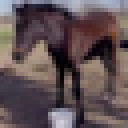
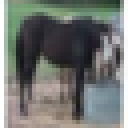
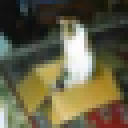
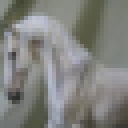
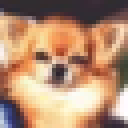
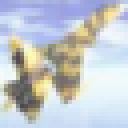
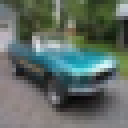
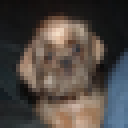
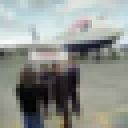
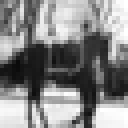

In [75]:
image(x) = x.img
ground_truth(x) = x.ground_truth

image.(imgs[ rand(1:end, 10) ])

The images are simply 32 X 32 matrices of numbers in 3 channels (R,G,B). We will arrange them in batches of say, 1000, and keep a validation set to track our progress.

In [76]:
# Defining a `getarray` function would help in converting the images (matrices) to `Float` type
getarray(X) = float.(permutedims(channelview(X), (2, 3, 1)))

X = [getarray(imgs[i].img) for i in 1:50000]
;

The first 49k images (in batches of 1000) will be our training set, and the rest is for validation. 

* `partition` handily breaks down the set we give it in consecutive parts (1000 in this case). 
* `cat` is a shorthand for concatenating multi-dimensional arrays along any dimension.

In [65]:
for b in partition(1:100, 20)
    println(maximum(b))
end

20
40
60
80
100


In [77]:
trainXY = ([(cat(X[i]..., dims = 4), labels[:,i]) for i in partition(1:49000, 1000)]) |> cpu
valX = cat(X[49001:50000]..., dims = 4) |> cpu
valY = labels[:, 49001:50000] |> cpu
;

#### CNN Classifier

In [68]:
cnn = Chain(
    Conv((5,5), 3=>16, relu),
    MaxPool((2,2)),
    Conv((5,5), 16=>8, relu),
    MaxPool((2,2)),
    flatten,
    Dense(200, 120),
    Dense(120, 84),
    Dense(84, 10),
    softmax
) |> cpu

Chain(Conv((5, 5), 3=>16, relu), MaxPool((2, 2), pad = (0, 0, 0, 0), stride = (2, 2)), Conv((5, 5), 16=>8, relu), MaxPool((2, 2), pad = (0, 0, 0, 0), stride = (2, 2)), flatten, Dense(200, 120), Dense(120, 84), Dense(84, 10), softmax)

We will use a crossentropy loss and the Momentum optimiser here. Crossentropy will be a good option when it comes to working with multiple independent classes. Momentum smooths out the noisy gradients and helps towards a smooth convergence. Gradually lowering the  learning rate along with momentum helps to maintain a bit of adaptivity in our optimisation, preventing us from overshooting our desired destination.

In [69]:
using Flux: Momentum

In [79]:
loss(x, y) = Flux.Losses.crossentropy(cnn(x), y)
opt = Momentum(0.01)

Momentum(0.01, 0.9, IdDict{Any,Any}())

We  will keep track of some basic accuracy numbers about our model. We can define an `accuracy` function for it like so.

In [80]:
accuracy(x, y) = mean(onecold(cnn(x), 1:10) .== onecold(y, 1:10))  # onecold is the inverse of onehot ie onecold([0, 1, 0], [a, b, c]) => b

accuracy (generic function with 1 method)

#### Training Loop

In [81]:
epochs = 10

for epoch = 1:epochs
  for xy in trainXY
    grads = gradient(params(cnn)) do
      l = loss(xy...)
    end
    update!(opt, params(cnn), grads)
  end
  @show accuracy(valX, valY)
end

accuracy(valX, valY) = 0.179
accuracy(valX, valY) = 0.32
accuracy(valX, valY) = 0.363
accuracy(valX, valY) = 0.386
accuracy(valX, valY) = 0.431
accuracy(valX, valY) = 0.467
accuracy(valX, valY) = 0.48
accuracy(valX, valY) = 0.492
accuracy(valX, valY) = 0.487
accuracy(valX, valY) = 0.504


2000 seconds to get to almost 50% accuracy, which is still better than random chance of 10%. Well this is a start

#### Testing

We have trained the network for 10 passes over the training dataset. But we need  check if the network has learnt anything at all. We will check this by predicting the class label that the neural network outputs, a checking it against the ground-truth. If the prediction is correct, we add the sample to the list of correct predictions. This will be done on a yet unseen section of data.

In [82]:
# repeat the exact same processing on the validation set as was done for the training set
valset = valimgs(CIFAR10)
valimg = [getarray(valset[i].img) for i in 1:10000]
labels = onehotbatch([valset[i].ground_truth.class for i in 1:10000],1:10)
testXY = ([(cat(valimg[i]..., dims = 4), labels[:,i]) for i in partition(1:10000, 1000)]) |> cpu
;

,,,,,,,,,

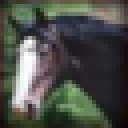
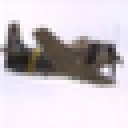
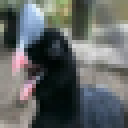
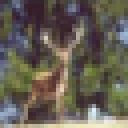
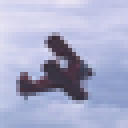
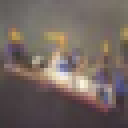
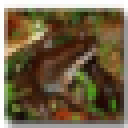
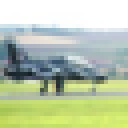
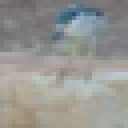
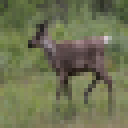

In [86]:
# let's view some random samples from the validation set
random_validation_set_idx = rand(1:10000, 10)
image.(valset[ random_validation_set_idx ])

Now let's see how the model fares on these images

In [87]:
rand_test = getarray.(image.(valset[random_validation_set_idx]))
rand_test = cat(rand_test..., dims = 4) |> cpu
rand_truth = ground_truth.(valset[random_validation_set_idx])
cnn(rand_test)

10×10 Array{Float32,2}:
 0.0130768   0.70111     0.0284376   0.00389475  …  0.18121     0.00879061
 0.002371    0.00747397  0.00604577  0.00625129     0.00864162  0.000496413
 0.111272    0.014708    0.0650842   0.153234       0.211006    0.294246
 0.253436    0.0378753   0.461011    0.203333       0.079362    0.0406714
 0.0965391   0.00539402  0.0181904   0.231379       0.153817    0.403133
 0.14975     0.0144696   0.220007    0.0891994   …  0.063814    0.0602866
 0.103718    0.0070733   0.0146803   0.263966       0.0353445   0.0938554
 0.256029    0.0235148   0.134161    0.0291062      0.0270741   0.0959271
 0.00483802  0.172233    0.00808989  0.00107957     0.228342    0.00161512
 0.00897019  0.0161476   0.0442927   0.0185566      0.0113882   0.000978245

The outputs are energies for the 10 classes. Higher the energy for a class, the more the network thinks that the image is of the particular class. Every column corresponds to the output of one image, with the 10 floats in the column being the energies.

We don't actually know just from these softmax energies, which labels correspond to each output. But we can still calculate a comparison:

In [91]:
onecold(cnn(rand_test), 1:10) |> println

[8, 1, 4, 7, 1, 9, 7, 1, 9, 5]


In [95]:
map(x -> x.class, rand_truth) |> println

[8, 1, 3, 5, 1, 9, 7, 1, 3, 5]


Our model was right on 7/10 classes.

Now let's evaluate the model on the full dataset

In [98]:
accuracy(testXY[1]...)

0.506